In [12]:
import pandas as pd

dataset = pd.read_csv('cluster_0.csv')
print(dataset.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.72             0.87               5                   223   
2                0.37             0.52               2                   159   
3                0.41             0.50               2                   153   
4                0.92             0.85               5                   259   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0      7   
1                   5              0     1                      0      7   
2                   3              0     1                      0      7   
3                   3              0     1                      0      7   
4                   5              0     1                      0      7   

   salary  cluster  
0       1        0  
1       1        0  

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dataset[dataset.drop(['cluster', 'salary', 'sales', 'promotion_last_5years', 'left', 'Work_accident'], axis=1).columns] = scaler.fit_transform(
    dataset[dataset.drop(['cluster', 'salary', 'sales', 'promotion_last_5years', 'left', 'Work_accident'], axis=1).columns]
)

print(dataset.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0            0.303371         0.265625            0.00              0.285047   
1            0.685393         0.796875            0.75              0.593458   
2            0.292135         0.250000            0.00              0.294393   
3            0.337079         0.218750            0.00              0.266355   
4            0.910112         0.765625            0.75              0.761682   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0               0.125              0     1                      0      7   
1               0.375              0     1                      0      7   
2               0.125              0     1                      0      7   
3               0.125              0     1                      0      7   
4               0.375              0     1                      0      7   

   salary  cluster  
0       1        0  
1       1        0  

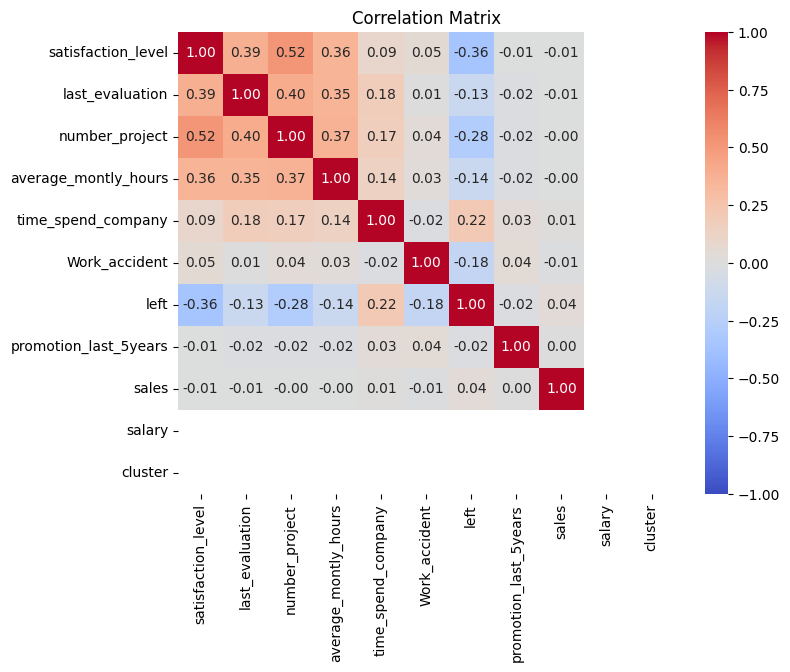

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = dataset.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [14]:
x = dataset.drop(['left', 'cluster'], axis=1)
y = dataset['left']

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

y_pred_knn = knn_model.predict(x_test)

print(f'KNN Results:\nAccuracy: {accuracy_score(y_test, y_pred_knn)}\nRecall: {recall_score(y_test, y_pred_knn)}')

KNN Results:
Accuracy: 0.9473257698541329
Recall: 0.9041916167664671


In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score

svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

y_pred_svm = svm.predict(x_test)

print(f'SVM Results:\nAccuracy: {accuracy_score(y_test, y_pred_svm)}\nRecall: {recall_score(y_test, y_pred_svm)}')

SVM Results:
Accuracy: 0.8168557536466775
Recall: 0.5658682634730539


In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score

# Naive Bayes model
nb = GaussianNB()
nb.fit(x_train, y_train)

# Predictions
y_pred_nb = nb.predict(x_test)

print(f'NB Results:\nAccuracy: {accuracy_score(y_test, y_pred_nb)}\nRecall: {recall_score(y_test, y_pred_nb)}')

NB Results:
Accuracy: 0.7698541329011345
Recall: 0.5868263473053892


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def create_ann(units, activation, optimizer, learning_rate, batch_size, weight_decay, hidden_layers):
    model = Sequential()
    
    # Add first hidden layer
    model.add(Dense(units=units, activation=activation, input_dim=x_train.shape[1]))
    
    # Add additional hidden layers
    for _ in range(hidden_layers - 1):
        model.add(Dense(units=units, activation=activation))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))  # For binary classification
    
    # Compile the model
    optimizer_instance = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer_instance, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [20]:
params = {'units': 32, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.008026, 
            'batch_size': 64, 'weight_decay': 0.000403, 'hidden_layers': 5, 'epochs': 150}

model = create_ann(
        units=params['units'],
        activation=params['activation'],
        optimizer=params['optimizer'],
        learning_rate=params['learning_rate'],
        batch_size=params['batch_size'],
        weight_decay=params['weight_decay'],
        hidden_layers=params['hidden_layers']
    )

c:\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.fit(x_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)

In [22]:
# Evaluate the model on the test data
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert predictions to binary labels

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [23]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"\nResults:")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")


Results:
Accuracy: 0.9700162074554295
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       900
           1       0.95      0.94      0.94       334

    accuracy                           0.97      1234
   macro avg       0.96      0.96      0.96      1234
weighted avg       0.97      0.97      0.97      1234



In [24]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for class imbalance (if necessary)
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Create DataFrames with consistent indices
x_resampled_df = pd.DataFrame(x_resampled, columns=x.columns)  # Resampled features
y_resampled_df = pd.Series(y_resampled, name='left')  # Resampled target

# Combine the resampled features and target
augmented_dataset = pd.concat([x_resampled_df, y_resampled_df], axis=1)

In [25]:
print(augmented_dataset.groupby('left').count())

      satisfaction_level  last_evaluation  number_project  \
left                                                        
0                   4588             4588            4588   
1                   4588             4588            4588   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0                     4588                4588           4588   
1                     4588                4588           4588   

      promotion_last_5years  sales  salary  
left                                        
0                      4588   4588    4588  
1                      4588   4588    4588  


In [26]:
x = augmented_dataset.drop(['left'], axis=1)
y = augmented_dataset['left']

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
model.fit(x_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)

In [29]:
# Evaluate the model on the test data
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert predictions to binary labels

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step


In [30]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"\nResults After Augmentation:")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")


Results After Augmentation:
Accuracy: 0.9705882352941176
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       910
           1       0.96      0.98      0.97       926

    accuracy                           0.97      1836
   macro avg       0.97      0.97      0.97      1836
weighted avg       0.97      0.97      0.97      1836

